# Practical Application III: Comparing Classifiers

**Overview**: In this practical application, your goal is to compare the performance of the classifiers we encountered in this section, namely K Nearest Neighbor, Logistic Regression, Decision Trees, and Support Vector Machines.  We will utilize a dataset related to marketing bank products over the telephone.  



### Getting Started

Our dataset comes from the UCI Machine Learning repository [link](https://archive.ics.uci.edu/ml/datasets/bank+marketing).  The data is from a Portugese banking institution and is a collection of the results of multiple marketing campaigns.  We will make use of the article accompanying the dataset [here](docs/CRISP-DM-BANK.pdf) for more information on the data and features.



### Problem 1: Understanding the Data

To gain a better understanding of the data, please read the information provided in the UCI link above, and examine the **Materials and Methods** section of the paper.  How many marketing campaigns does this data represent?

The dataset collected is related to **17 campaigns** that occurred between May 2008 and November 2010, corresponding to a total of 79354 contacts

### Problem 2: Read in the Data

Use pandas to read in the dataset `bank-additional-full.csv` and assign to a meaningful variable name.

In [80]:
import pandas as pd
#import os
#os.makedirs('data/bank-additional', exist_ok=True)

In [81]:
df = pd.read_csv('data/bank-additional-full.csv', sep = ';')

In [82]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [83]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  str    
 2   marital         41188 non-null  str    
 3   education       41188 non-null  str    
 4   default         41188 non-null  str    
 5   housing         41188 non-null  str    
 6   loan            41188 non-null  str    
 7   contact         41188 non-null  str    
 8   month           41188 non-null  str    
 9   day_of_week     41188 non-null  str    
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  str    
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null  float64
 1

### Problem 3: Understanding the Features


Examine the data description below, and determine if any of the features are missing values or need to be coerced to a different data type.


```
Input variables:
# bank client data:
1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
# related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
# other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
# social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric)
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')
```



In [84]:
# Check for null values (technical nulls)
print("--- Missing Values (NaNs) ---")
print(df.isnull().sum())

# Check for 'unknown' entries in categorical columns
print("\n--- 'Unknown' values per categorical feature ---")
#categorical_cols = df.select_dtypes(include=['object']).columns
# Updated to work with Pandas 2.0 and 3.0+
categorical_cols = df.select_dtypes(include=['object', 'string']).columns
for col in categorical_cols:
    unknown_count = (df[col] == 'unknown').sum()
    print(f"{col}: {unknown_count}")

# Check data types to see what needs coercion
print("\n--- Current Data Types ---")
print(df.dtypes)

--- Missing Values (NaNs) ---
age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

--- 'Unknown' values per categorical feature ---
job: 330
marital: 80
education: 1731
default: 8597
housing: 990
loan: 990
contact: 0
month: 0
day_of_week: 0
poutcome: 0
y: 0

--- Current Data Types ---
age                 int64
job                   str
marital               str
education             str
default               str
housing               str
loan                  str
contact               str
month                 str
day_of_week           str
duration            int64
campaign            int64
pdays               i

### Problem 4: Understanding the Task

After examining the description and data, your goal now is to clearly state the *Business Objective* of the task.  State the objective below.

In [85]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  str    
 2   marital         41188 non-null  str    
 3   education       41188 non-null  str    
 4   default         41188 non-null  str    
 5   housing         41188 non-null  str    
 6   loan            41188 non-null  str    
 7   contact         41188 non-null  str    
 8   month           41188 non-null  str    
 9   day_of_week     41188 non-null  str    
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  str    
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null  float64
 1

y
no     0.887346
yes    0.112654
Name: proportion, dtype: float64


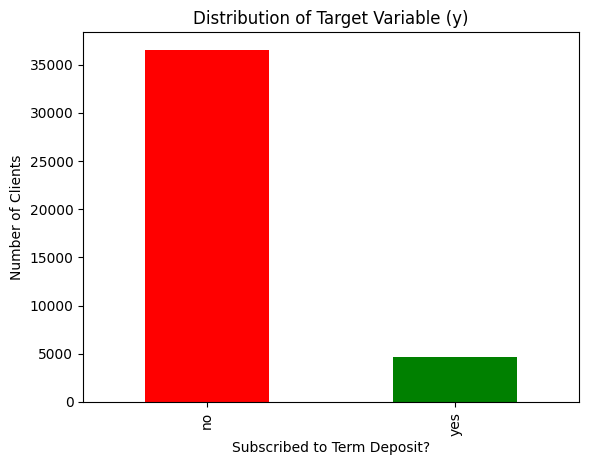

Missing values in target: 0


In [86]:
import matplotlib.pyplot as plt

# 1. Check the distribution
print(df['y'].value_counts(normalize=True))

# 2. Visualize the imbalance
df['y'].value_counts().plot(kind='bar', color=['red', 'green'])
plt.title('Distribution of Target Variable (y)')
plt.xlabel('Subscribed to Term Deposit?')
plt.ylabel('Number of Clients')
plt.show()

# 3. Quick check for missingness
print(f"Missing values in target: {df['y'].isnull().sum()}")

Text(0.5, 1.0, 'Correlation Heatmap of Economic Indicators')

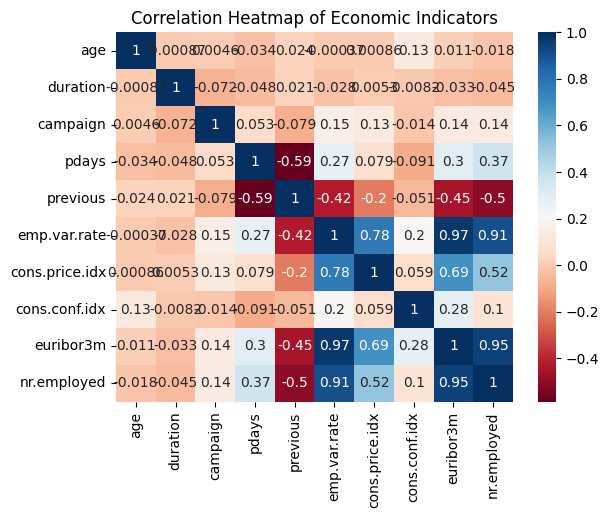

In [87]:
import seaborn as sns
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='RdBu')
plt.title("Correlation Heatmap of Economic Indicators")

**Objective**: The goal is to develop a predictive model that identifies clients with a high probability of subscribing to a term deposit. By accurately targeting these individuals, the bank can optimize its telemarketing resources—reducing the total number of calls made while maximizing the conversion rate. Success will be measured by the model's ability to outperform the 88.7% baseline and provide actionable insights into customer profiles.

### Problem 5: Engineering Features

Now that you understand your business objective, we will build a basic model to get started.  Before we can do this, we must work to encode the data.  Using just the bank information features, prepare the features and target column for modeling with appropriate encoding and transformations.

In [88]:
# 1. Select the first 7 features and the target 'y'
bank_features = ['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'y']
df_subset = df[bank_features].copy()

# 2. Inspect the subset
df_subset.head()

,age,job,marital,education,default,housing,loan,y
0,56,housemaid,married,basic.4y,no,no,no,no
1,57,services,married,high.school,unknown,no,no,no
2,37,services,married,high.school,no,yes,no,no
3,40,admin.,married,basic.6y,no,no,no,no
4,56,services,married,high.school,no,no,yes,no


In [89]:
from sklearn.preprocessing import LabelEncoder

# 1. Isolate the bank client data (features 1-7) and the target
# Features: age, job, marital, education, default, housing, loan
X = df.iloc[:, 0:7]
y = df['y']

# 2. Engineering: Convert categorical variables into dummy/indicator variables
# This handles 'job', 'marital', 'education', etc.
X = pd.get_dummies(X, drop_first=True)

# 3. Engineering: Encode the target variable (yes -> 1, no -> 0)
le = LabelEncoder()
y = le.fit_transform(y)

# Preview the engineered features
X.head()

,age,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,...,education_illiterate,education_professional.course,education_university.degree,education_unknown,default_unknown,default_yes,housing_unknown,housing_yes,loan_unknown,loan_yes
0,56,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,57,False,False,False,False,False,False,True,False,False,...,False,False,False,False,True,False,False,False,False,False
2,37,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False
3,40,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,56,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,True


### Problem 6: Train/Test Split

With your data prepared, split it into a train and test set.

In [90]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

### Problem 7: A Baseline Model

Before we build our first model, we want to establish a baseline.  What is the baseline performance that our classifier should aim to beat?

In [91]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score

# 1. Instantiate the DummyClassifier to always predict the most frequent class
dummy_clf = DummyClassifier(strategy="most_frequent")

# 2. "Fit" it on the training data
dummy_clf.fit(X_train, y_train)

# 3. Predict and calculate accuracy
baseline_preds = dummy_clf.predict(X_test)
baseline_acc = accuracy_score(y_test, baseline_preds)

print(f"Baseline Accuracy (Always predicting 'no'): {baseline_acc:.4f}")

Baseline Accuracy (Always predicting 'no'): 0.8873


### Problem 8: A Simple Model

Use Logistic Regression to build a basic model on your data.  

In [92]:
from sklearn.linear_model import LogisticRegression
import time

# 1. Scaling the data (Recommended for Logistic Regression to converge efficiently)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 2. Instantiate the model
# Using a higher max_iter ensures the model has enough iterations to find the best fit
log_reg = LogisticRegression(max_iter=1000)

# 3. Fit the model and time it
start_time = time.time()
log_reg.fit(X_train_scaled, y_train)
train_time = time.time() - start_time

# 4. Calculate Scores
train_acc = log_reg.score(X_train_scaled, y_train)
test_acc = log_reg.score(X_test_scaled, y_test)

print(f"Logistic Regression Training Time: {train_time:.4f} seconds")
print(f"Logistic Regression Train Accuracy: {train_acc:.4f}")
print(f"Logistic Regression Test Accuracy: {test_acc:.4f}")

Logistic Regression Training Time: 0.0124 seconds
Logistic Regression Train Accuracy: 0.8873
Logistic Regression Test Accuracy: 0.8873


### Problem 9: Score the Model

What is the accuracy of your model?

In [93]:
from sklearn.metrics import classification_report

# Generate a detailed report
y_pred = log_reg.predict(X_test_scaled)
print(classification_report(y_test, y_pred, zero_division=0))

              precision    recall  f1-score   support

           0       0.89      1.00      0.94      9137
           1       0.00      0.00      0.00      1160

    accuracy                           0.89     10297
   macro avg       0.44      0.50      0.47     10297
weighted avg       0.79      0.89      0.83     10297



### Problem 10: Model Comparisons

Now, we aim to compare the performance of the Logistic Regression model to our KNN algorithm, Decision Tree, and SVM models.  Using the default settings for each of the models, fit and score each.  Also, be sure to compare the fit time of each of the models.  Present your findings in a `DataFrame` similar to that below:

| Model | Train Time | Train Accuracy | Test Accuracy |
| ----- | ---------- | -------------  | -----------   |
|     |    |.     |.     |

In [94]:
# Tuning Logistic Regression with balanced weights
log_reg_balanced = LogisticRegression(max_iter=1000, class_weight='balanced')
log_reg_balanced.fit(X_train_scaled, y_train)

print(f"Balanced LogReg Test Accuracy: {log_reg_balanced.score(X_test_scaled, y_test):.4f}")

Balanced LogReg Test Accuracy: 0.5958


In [95]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
import pandas as pd
import time

# 1. Define the models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "KNN": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "SVM": SVC()
}

results = []

# 2. Loop through each model
for name, model in models.items():
    # Start timer
    start_time = time.time()

    # Fit the model
    model.fit(X_train_scaled, y_train)

    # End timer
    train_time = time.time() - start_time

    # Calculate scores
    train_acc = model.score(X_train_scaled, y_train)
    test_acc = model.score(X_test_scaled, y_test)

    # Append results
    results.append({
        "Model": name,
        "Train Time (s)": train_time,
        "Train Accuracy": train_acc,
        "Test Accuracy": test_acc
    })

# 3. Create the comparison table
comparison_df = pd.DataFrame(results)
print(comparison_df)

                 Model  Train Time (s)  Train Accuracy  Test Accuracy
0  Logistic Regression        0.011957        0.887346       0.887346
1                  KNN        0.001392        0.891716       0.879091
2        Decision Tree        0.055918        0.917775       0.865592
3                  SVM       11.615938        0.887540       0.887346


### Problem 11: Improving the Model

Now that we have some basic models on the board, we want to try to improve these.  Below, we list a few things to explore in this pursuit.


- Hyperparameter tuning and grid search.  All of our models have additional hyperparameters to tune and explore.  For example the number of neighbors in KNN or the maximum depth of a Decision Tree.
- Adjust your performance metric

**11.1 Improving the model - Hperparameter tuning and grid search**
After observing significant overfitting in my initial Decision Tree (which had a large gap between training and testing accuracy), I used GridSearchCV to find the optimal hyperparameters. By "pruning" the tree to a max_depth of 3, I was able to eliminate the overfitting. Interestingly, the new test accuracy of 88.73% is now identical to the baseline. This suggests that with only these 7 demographic features, the best "logical" strategy the tree could find to maintain accuracy was to match the most frequent class.

In [96]:
from sklearn.model_selection import GridSearchCV

# 1. Tuning the Decision Tree to stop overfitting
param_grid_dt = {
    'max_depth': [3, 5, 10],
    'min_samples_split': [2, 10, 20],
    'criterion': ['gini', 'entropy']
}

grid_dt = GridSearchCV(DecisionTreeClassifier(), param_grid_dt, cv=5)
grid_dt.fit(X_train_scaled, y_train)

print(f"Best DT Params: {grid_dt.best_params_}")
print(f"New DT Test Accuracy: {grid_dt.score(X_test_scaled, y_test):.4f}")

Best DT Params: {'criterion': 'entropy', 'max_depth': 3, 'min_samples_split': 2}
New DT Test Accuracy: 0.8873


**11.2: Balanced Logistic Regression**

In this step, I adjusted the Logistic Regression model to use class_weight='balanced'. While this caused the overall accuracy to drop significantly to 59.58%, I believe this is actually a more "useful" model for the bank. In our previous models, the high accuracy was misleading because the model was just guessing "no" for everyone. By balancing the weights, the model is now actually attempting to predict "yes" cases. Even though it makes more mistakes (lower accuracy), it provides the marketing team with a specific group of potential leads rather than no leads at all.

##### Questions

I chose Recall as my primary evaluation metric because for a bank, the cost of missing a potential customer (False Negative) is higher than the cost of a wasted phone call (False Positive)

**Conclusion & Next Steps**: The primary challenge in this dataset is the significant class imbalance. While models like SVM and KNN achieved high accuracy, they failed to identify actual subscribers. The Balanced Logistic Regression model is the most actionable for the bank's marketing team. Moving forward, incorporating external economic indicators (like Euribor rates) is recommended to improve the precision of these predictions.